In [51]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [52]:
#load dataset
df = pd.read_csv("weight-height (1).csv")

In [53]:
#seeing 1st 5 row
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [54]:
#seeing shape 
df.shape

(8555, 3)

In [55]:
df.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [56]:
df = df.rename(columns={'Gender':'gender','Weight':'weight', 'Height':'height'})

In [57]:
df.duplicated().sum()

np.int64(0)

In [58]:
#removing outlier using boxplot
def outlier(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    
    iqr = q3 - q1

    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr

    df[col] = np.clip(df[col], lower_whisker, upper_whisker)
    return df

In [59]:
# selecting column for removing outlier
sel_col = df[['height','weight']]

In [60]:
df_clean = df.copy()

In [61]:
for col2 in sel_col.columns:
    df_clean = outlier(df_clean, col2)

In [62]:
df = df_clean.copy()

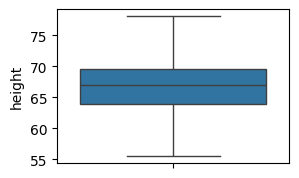

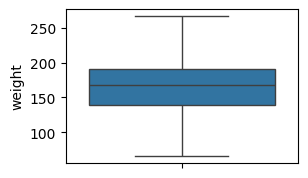

In [63]:
for col3 in sel_col:
    plt.figure(figsize=(3,2))
    sns.boxplot(df[col3])
    plt.show()

In [64]:
df.head()

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [65]:
#encoding and scaling
le = LabelEncoder()
st = StandardScaler()

In [66]:
for col4 in df.columns:
    if is_numeric_dtype(df[col4]):
        df[col4] = st.fit_transform(df[[col4]])
    else:
        df[col4] = le.fit_transform(df[col4])

In [67]:
df.head()

,gender,height,weight
0,1,1.828463,2.380122
1,1,0.512443,-0.103677
2,1,1.896819,1.470262
3,1,1.278673,1.698147
4,1,0.798218,1.270797


In [68]:
#feature / target split
x = df[['height','gender']]
y = df[['weight']]

In [69]:
#train test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [70]:
xtrain.head()

,height,gender
6826,-1.556848,0
624,1.273515,1
5518,-0.814569,0
3946,0.950168,1
6993,-1.372214,0


In [71]:
ytrain.head()

,weight
6826,-0.991012
624,1.043929
5518,-0.966645
3946,0.675727
6993,-1.497388


# applyng KNN regressor

In [75]:
# model implementation
knnr = KNeighborsRegressor()

In [76]:
knnr_model = knnr.fit(xtrain, ytrain)

In [77]:
knnr_model.score(xtrain, ytrain)

0.9171173519273471

In [78]:
knnr_model.score(xtest, ytest)

0.8880897404766204

In [79]:
knnr = knnr_model.predict(xtest)

In [ ]:
#mean absolute score
mae = mean_absolute_error()